Task-1

•	Write a procedure that outputs a random signed graph according to the following model: on input $n$ (number of vertices) and $0<p^+,p^-<1$ with $p^++p^-<1$, determine, for each of the $\binom{n}{2}$ many vertex pairs~$e$ if $e$ is positive (with probability $p^+$) or negative (with probability $p^-$) or not present (with probability $1-p^+-p^-$)

In [11]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [14]:
def generate_random_signed_graph(n, p_plus, p_minus):
    if p_plus + p_minus >= 1:
        raise ValueError("p+ + p- should be less than 1.")
    elif p_plus < 0:
        raise ValueError("p+ should be greater than 0.")
    elif p_minus < 0:
        raise ValueError("p- should be greater than 0.")
        
    G = nx.Graph()

    # Add n vertices to the graph
    G.add_nodes_from(range(n))

    # Generate edges with positive, negative, or no sign based on probabilities
    all_edges = list(itertools.combinations(range(n), 2))
    for edge in all_edges:
        prob = random.random()
        if prob < p_plus:
            sign = 1
        elif prob < p_plus + p_minus:
            sign = -1
        else:
            continue

        u, v = edge
        G.add_edge(u, v, sign=sign)

    return G

def write_signed_graph_to_file(graph):
    
    # storing generated graph as a .txt file
    
    current_date = datetime.datetime.now().strftime("%Y-%m-%d-%m-%s")
    filename = f"signed_graph_{current_date}.txt"
    
    with open(filename, 'w') as file:
        for u, v, data in graph.edges(data=True):
            sign = data.get('sign', 1)
            file.write(f"{u} {v} {sign}\n")
    

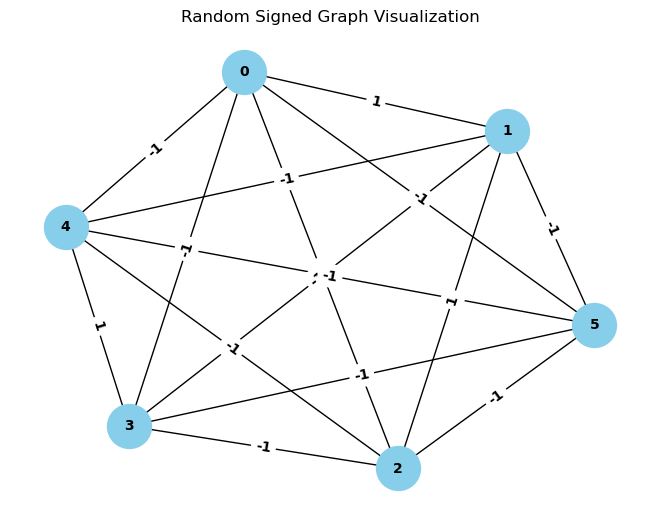

In [15]:
# Example usage:
n_vertices = 6
p_plus = 0.5
p_minus = 0.5
random_signed_graph = generate_random_signed_graph(n_vertices, p_plus, p_minus)
write_signed_graph_to_file(random_signed_graph)

# Display the graph using NetworkX and matplotlib
pos = nx.spring_layout(random_signed_graph)
nx.draw(random_signed_graph, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(random_signed_graph, 'sign')
nx.draw_networkx_edge_labels(random_signed_graph, pos, edge_labels=labels, font_size=10, font_weight='bold')
plt.title("Random Signed Graph Visualization")
plt.show()

Task-1

•	Write a procedure that outputs a random signed graph according to the following model: on input $n$ (number of vertices) and $0<p^+,p^-<1$ with $p^++p^-<1$, determine, for each of the $\binom{n}{2}$ many vertex pairs~$e$ if $e$ is positive (with probability $p^+$) or negative (with probability $p^-$) or not present (with probability $1-p^+-p^-$)

In [6]:
import random
import itertools

In [7]:
def generate_random_signed_graphs(n, p_plus, p_minus):
    if p_plus + p_minus >= 1:
        raise ValueError("p+ + p- should be less than 1.")
    elif p_plus < 0:
        raise ValueError("p+ should be greater than 0.")
    elif p_minus < 0:
        raise ValueError("p- should be greater than 0.")

    signed_graph = {str(i): [] for i in range(n)}
    print(signed_graph)

    # Generate edges with positive, negative, or no sign based on probabilities
    all_edges = list(itertools.combinations(range(n), 2))
    print(all_edges)
    for edge in all_edges:
        prob = random.random()
        if prob < p_plus:
            sign = 1
        elif prob < p_plus + p_minus:
            sign = -1
        else:
            continue

        u, v = edge
        signed_graph[str(u)].append((str(v), sign))
        signed_graph[str(v)].append((str(u), sign))

    return signed_graph

def write_signed_graph_to_file(graph):
    
    # storing generated graph as a .txt file
    
    current_date = datetime.datetime.now().strftime("%Y-%m-%d-%m-%s")
    filename = f"signed_graph_{current_date}.txt"
    
    with open(filename, 'w') as file:
        for u, v, data in graph.edges(data=True):
            sign = data.get('sign', 1)
            file.write(f"{u} {v} {sign}\n")

In [8]:

# Example usage:
n_vertices = 5
p_plus = 0.3
p_minus = 0.2
random_signed_graph = generate_random_signed_graphs(n_vertices, p_plus, p_minus)
print(random_signed_graph)

{'0': [], '1': [], '2': [], '3': [], '4': []}
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
{'0': [('1', 1), ('3', -1)], '1': [('0', 1), ('2', -1), ('4', 1)], '2': [('1', -1)], '3': [('0', -1), ('4', 1)], '4': [('1', 1), ('3', 1)]}


In [9]:
#Just to convert the dictionary format as the simple edge list format
data = random_signed_graph
edge_list = []
for node, edges in data.items():
    for edge in edges:
        target_node, weight = edge
        edge_list.append(f"{node} {target_node} {weight}")

output = "\n".join(edge_list)
print(output)



0 1 1
0 3 -1
1 0 1
1 2 -1
1 4 1
2 1 -1
3 0 -1
3 4 1
4 1 1
4 3 1


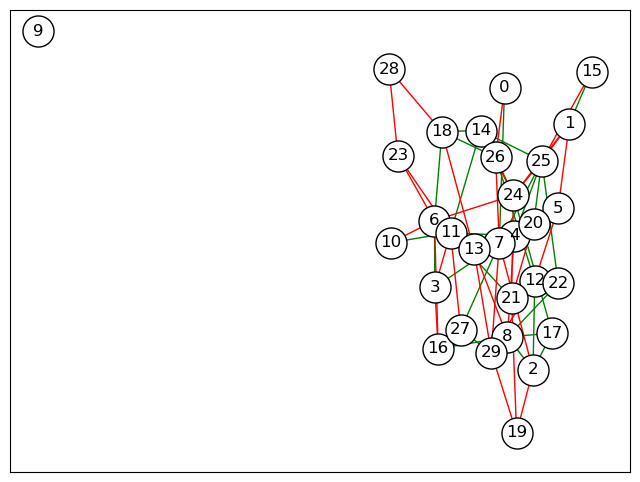

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import datetime


def erdos_renyi_signed_graph(num_nodes, avg_degree):
    # Generate a random graph using Erdős-Rényi model
    G = nx.erdos_renyi_graph(num_nodes, avg_degree / (num_nodes - 1))
    
    # Assign random signs to the edges
    for u, v in G.edges():
        sign = random.choice([1, -1])
        G[u][v]["sign"] = sign
    
    return G

def convert_graph_to_dict(G):
    
    # making graph_dict for further purpose
    graph_dict = {}
    for u, v, sign in G.edges(data="sign"):
        if u not in graph_dict:
            graph_dict[u] = []
        if v not in graph_dict:
            graph_dict[v] = []
        graph_dict[u].append((v, sign))
        graph_dict[v].append((u, sign))
    
    return graph_dict
    

def visualize_signed_graph(G):
    
    # Visualize the graph with positive edges in green and negative edges in red
    pos_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == 1]
    neg_edges = [(u, v) for u, v, sign in G.edges(data="sign") if sign == -1]

#     pos_nodes = set([u for u, v in pos_edges] + [v for u, v in pos_edges])
#     neg_nodes = set([u for u, v in neg_edges] + [v for u, v in neg_edges])

    pos = nx.spring_layout(G)
    
    plt.figure(figsize=(8,6))
    
    nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_color="white", node_size=500, edgecolors='black', linewidths=1.0)
#     nx.draw_networkx_nodes(G, pos, nodelist=neg_nodes, node_color="r", node_size=100)
    nx.draw_networkx_edges(G, pos, edgelist=pos_edges, edge_color="g")
    nx.draw_networkx_edges(G, pos, edgelist=neg_edges, edge_color="r")
    nx.draw_networkx_labels(G, pos,  font_size=12, font_color='black')

    plt.show()
    

def write_signed_graph_to_file(graph):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d-%m-%s")
    filename = f"signed_graph_{current_date}.txt"
    
    with open(filename, 'w') as file:
        for u, v, data in graph.edges(data=True):
            sign = data.get('sign', 1)
            file.write(f"{u} {v} {sign}\n")

# Example usage
num_nodes = 30
avg_degree = 4
G = erdos_renyi_signed_graph(num_nodes, avg_degree)
graph_dict = convert_graph_to_dict(G)
visualize_signed_graph(G)
# write_signed_graph_to_file(G)

